In [1]:
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

# Load data:
clark_county_ts2021 = pd.read_csv("H:/My Drive/7. SNV Industry Study/SNV_ArcGIS/IHS Files/Clark_County_TS2021.csv")
bridges_excel = pd.ExcelFile("H:/My Drive/7. SNV Industry Study/SNV_ArcGIS/IHS Files/bridges.xlsx")

#naics_stcc = pd.read_excel("H:/My Drive/7. SNV Industry Study/SNV_ArcGIS/IHS Files/STCC_NAICS.xlsx")
naics_stcc_excel = pd.ExcelFile("H:/My Drive/7. SNV Industry Study/SNV_ArcGIS/IHS Files/STCC_NAICS.xlsx")

# Load necessary sheets from the Excel file
stcc = bridges_excel.parse("STCC")
modes = bridges_excel.parse("Modes")

naics_stcc = naics_stcc_excel.parse("stcc_naics_bridge")
naics_desc = naics_stcc_excel.parse("naics_description")

# Checking for duplicates
clark_county_ts2021 = clark_county_ts2021.drop_duplicates()

# Ensure 'STCC4' column in both dataframes is of type string
# For example, replace NaN with a known string
stcc['STCC4'] = stcc['STCC4'].astype(str)
naics_stcc['STCC4'] = naics_stcc['STCC4'].astype(str)
naics_stcc['NAICS_code'] = naics_stcc['NAICS_code'].astype(str)
# Create a new DataFrame from 'stcc' that only includes rows with 2-digit 'STCC' codes
stcc_2digit = stcc[stcc['STCC'].str.len() == 2].copy()
# Ensure 'STCC4' is of type string
stcc_2digit['STCC4'] = stcc_2digit['STCC4'].astype(str)
# Merge stcc_2digit and naics_stcc using STCC4
#stcc_2digit = pd.merge(stcc_2digit, naics_stcc, how='left', on='STCC4')
stcc = pd.merge(stcc, naics_stcc, how='left', on='STCC4')

# Merge stcc (which now includes naics_stcc data) into clark_county_ts2021 using STCC
clark_county_ts2021 = pd.merge(clark_county_ts2021, stcc, how='left', on='STCC')

# Merge modes into clark_county_ts2021 using Mode
clark_county_ts2021 = pd.merge(clark_county_ts2021, modes, how='left', on='Mode')

# Create 'STCC_2digit' column in 'clark_county_ts2021' DataFrame
clark_county_ts2021['STCC_2digit'] = clark_county_ts2021['STCC'].str[:2]

# Print DataFrame to check
#print(clark_county_ts2021)


In [2]:
clark_county_ts2021 = pd.merge(clark_county_ts2021, stcc_2digit, how='left', left_on='STCC_2digit', right_on='STCC')


In [3]:
clark_county_ts2021

,Year,Origin Region,Destination Region,STCC_x,Trade Type,Mode,Tons,Units,Value,Average Miles,...,Commodity_x,STCC4_x,NAICS_code,Code,Name,Group,STCC_2digit,STCC_y,Commodity_y,STCC4_y
0,2015,1,165,01 14,D,4,0.060575,0.003927,1.678699e+01,2348.3999,...,"Oil Kernels, Nuts or Seeds",114,111110,TL,Truck Truckload,Truck,01,01,Farm Products,100
1,2015,1,165,01 19,D,4,0.447512,0.021637,6.846934e+01,2348.3999,...,Misc. Field Crops,119,111900,TL,Truck Truckload,Truck,01,01,Farm Products,100
2,2015,1,165,14 51,D,4,0.295351,0.012149,1.261019e+01,2339.9998,...,Clay Ceramic or Refrac Minerals,1451,212324,TL,Truck Truckload,Truck,14,14,Nonmetallic Minerals,1400
3,2015,1,166,35 35,D,5,3.790659,0.285492,3.219333e+04,2192.8999,...,Conveyors or Parts,3535,333922,LTL,Truck L-T-L,Truck,35,35,Machinery,3500
4,2015,1,32003,01 19,D,4,0.735466,0.035559,1.125264e+02,1970.6001,...,Misc. Field Crops,119,111900,TL,Truck Truckload,Truck,01,01,Farm Products,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058238,2050,32003,32003,50 1,D,5,36925.441000,1796.137100,5.283480e+07,16.0000,...,Warehouse & Distribution Center,5010,493000,LTL,Truck L-T-L,Truck,50,50,Secondary Traffic,5000
1058239,2050,32003,32003,50 1,D,6,841962.750000,40954.977000,1.204723e+09,16.0000,...,Warehouse & Distribution Center,5010,493000,PVT,Truck PVT,Truck,50,50,Secondary Traffic,5000
1058240,2050,32003,32003,50 22,D,4,196761.920000,13588.907000,1.063695e+09,16.0000,...,Rail Intermodal Drayage from Ramp,5022,482110,TL,Truck Truckload,Truck,50,50,Secondary Traffic,5000
1058241,2050,32003,32003,50 31,D,4,62400.527000,3167.539600,8.104652e+08,16.0000,...,Air Freight Drayage to Airport,5031,481000,TL,Truck Truckload,Truck,50,50,Secondary Traffic,5000


In [4]:
summary = clark_county_ts2021.groupby(['Year', 'STCC_2digit', 'STCC_x', 'Commodity_x'])[['Tons', 'Value']].sum().reset_index()


In [5]:
# Concatenate 'STCC' and 'Commodity'
summary['Commodity'] = summary.apply(lambda row: f"{row['STCC_x']} {row['Commodity_x']}", axis=1)


In [6]:
print(summary)

      Year STCC_2digit STCC_x                        Commodity_x  \
0     2015          01  01 12                         Cotton,raw   
1     2015          01  01 13                              Grain   
2     2015          01  01 14         Oil Kernels, Nuts or Seeds   
3     2015          01  01 15                        Field Seeds   
4     2015          01  01 19                  Misc. Field Crops   
...    ...         ...    ...                                ...   
1723  2050          50   50 1    Warehouse & Distribution Center   
1724  2050          50  50 21    Rail Intermodal Drayage to Ramp   
1725  2050          50  50 22  Rail Intermodal Drayage from Ramp   
1726  2050          50  50 31     Air Freight Drayage to Airport   
1727  2050          50  50 32   Air Freight Drayage from Airport   

              Tons         Value                                Commodity  
0     5.767483e+03  7.521359e+06                         01 12 Cotton,raw  
1     2.911052e+05  5.517302e+0

In [7]:
from adjustText import adjust_text

colors = ['red', 'blue', 'green', 'purple', 'cyan', 'orange', 'yellow', 'brown', 'pink', 'gray']

def create_commodity_time_series(df, variable):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    top_commodities = df.groupby('Commodity').agg({variable: 'sum'}).nlargest(10, variable).index
    
    for idx, commodity in enumerate(top_commodities):
        commodity_data = df[df['Commodity'] == commodity].sort_values(by="Year")
        ax.plot('Year', variable, data=commodity_data, color=colors[idx], linewidth=2, label=commodity)
        #ax.scatter('Year', variable, data=commodity_data, color=colors[idx])
    
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.2f}'))
    ax.legend()
    ax.set_title(f'Top 10 Commodities by {variable} for 2015, 2019, 2021, 2050', fontsize=16)
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel(f'{variable}', fontsize=14)
    ax.grid(True)
    plt.show()

# For value
create_commodity_time_series(top_value_df, 'Value')
# For tons
create_commodity_time_series(top_tons_df, 'Tons')


NameError: name 'top_value_df' is not defined

In [20]:
#!pip install adjustText

In [8]:
duplicates = summary[summary.duplicated(subset=['Year', 'Commodity'])]
print(duplicates)


Empty DataFrame
Columns: [Year, STCC_2digit, STCC_x, Commodity_x, Tons, Value, Commodity]
Index: []


In [5]:
# Filter the dataframe by STCC_2digit value 30
stcc_30 = summary[summary['STCC_2digit'] == '30']

# Display the resulting dataframe
print(stcc_30.sort_values(by=['Year', 'Commodity_x']))


NameError: name 'summary' is not defined

In [9]:
# Grouping by 'Year', 'STCC_2digit', and 'Commodity_x', and then summing 'Tons' and 'Value'
aggregated_summary = summary.groupby(['Year', 'STCC_2digit', 'STCC_x', 'Commodity']).agg({'Tons': 'sum', 'Value': 'sum'}).reset_index()

# Now, you can inspect the data for STCC_2digit value 30
#print(aggregated_summary[aggregated_summary['STCC_2digit'] == '30'].sort_values(by=['Year', 'Commodity_x']))


In [10]:
aggregated_summary

,Year,STCC_2digit,STCC_x,Commodity,Tons,Value
0,2015,01,01 12,"01 12 Cotton,raw",5.767483e+03,7.521359e+06
1,2015,01,01 13,01 13 Grain,2.911052e+05,5.517302e+07
2,2015,01,01 14,"01 14 Oil Kernels, Nuts or Seeds",4.015772e+04,1.659783e+07
3,2015,01,01 15,01 15 Field Seeds,4.312871e+04,8.240748e+07
4,2015,01,01 19,01 19 Misc. Field Crops,2.414215e+06,4.395980e+08
...,...,...,...,...,...,...
1723,2050,50,50 1,50 1 Warehouse & Distribution Center,1.092319e+07,1.562946e+10
1724,2050,50,50 21,50 21 Rail Intermodal Drayage to Ramp,6.938257e+03,3.750822e+07
1725,2050,50,50 22,50 22 Rail Intermodal Drayage from Ramp,4.821186e+05,2.606334e+09
1726,2050,50,50 31,50 31 Air Freight Drayage to Airport,6.281641e+04,8.158667e+08


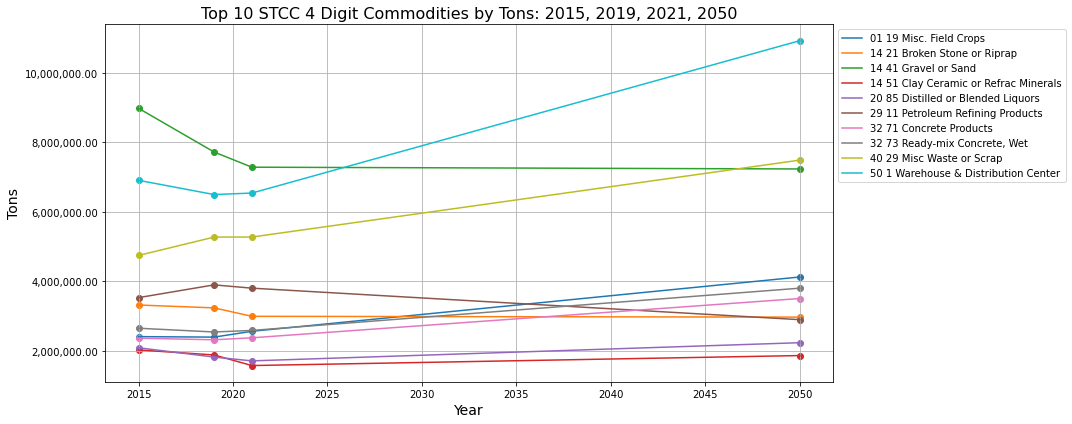

In [11]:
# Example for Value
top_commodities = aggregated_summary.groupby('STCC_x')['Tons'].sum().nlargest(10).index.tolist()
filtered_summary = aggregated_summary[aggregated_summary['STCC_x'].isin(top_commodities)]
pivot_data = filtered_summary.pivot(index='Year', columns='Commodity', values='Tons')


def create_time_series_pivot(df):
    fig, ax = plt.subplots(figsize=(15, 6))
    
    for commodity in df.columns:
        ax.plot(df.index, df[commodity], label=commodity)
        ax.scatter(df.index, df[commodity])

    # Set legend outside the plot
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.2f}'))
    ax.set_title('Top 10 STCC 4 Digit Commodities by Tons: 2015, 2019, 2021, 2050', fontsize=16)
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('Tons', fontsize=14)
    ax.grid(True)
    
    # Adjust the layout
    plt.tight_layout()
    plt.show()

create_time_series_pivot(pivot_data)


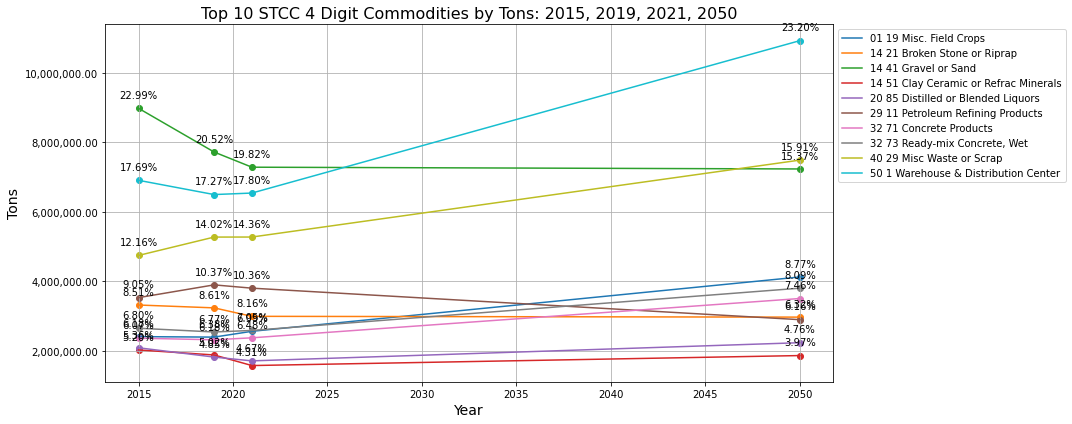

In [10]:


top_commodities = aggregated_summary.groupby('STCC_x')['Tons'].sum().nlargest(10).index.tolist()
filtered_summary = aggregated_summary[aggregated_summary['STCC_x'].isin(top_commodities)]
pivot_data = filtered_summary.pivot(index='Year', columns='Commodity', values='Tons')

# Calculate total tons per year
total_tons_per_year = filtered_summary.groupby('Year')['Tons'].sum()

def calculate_percent_share(row):
    year = row.name
    total_for_year = total_tons_per_year[year]
    return (row / total_for_year) * 100

# Create a percentage dataframe
percent_df = pivot_data.apply(calculate_percent_share, axis=1)

def create_time_series_pivot(df, percent_df):
    fig, ax = plt.subplots(figsize=(15, 6))
    
    for commodity in df.columns:
        ax.plot(df.index, df[commodity], label=commodity)
        ax.scatter(df.index, df[commodity])
        for year in df.index:
            ax.annotate(f"{percent_df.at[year, commodity]:.2f}%", 
                        (year, df.at[year, commodity]), 
                        textcoords="offset points", 
                        xytext=(0,10), 
                        ha='center')

    # Set legend outside the plot
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.2f}'))
    ax.set_title('Top 10 STCC 4 Digit Commodities by Tons: 2015, 2019, 2021, 2050', fontsize=16)
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('Tons', fontsize=14)
    ax.grid(True)
    
    # Adjust the layout
    plt.tight_layout()
    plt.show()

create_time_series_pivot(pivot_data, percent_df)


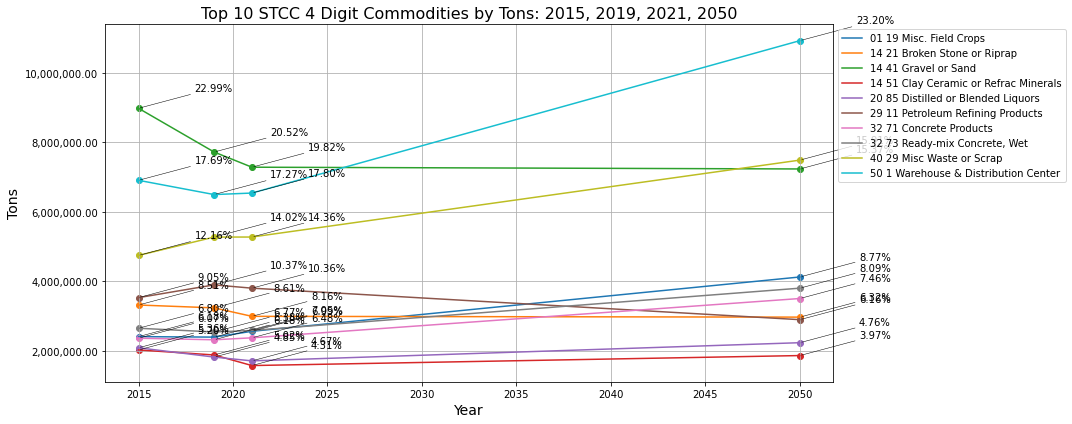

In [53]:


top_commodities = aggregated_summary.groupby('STCC_x')['Tons'].sum().nlargest(10).index.tolist()
filtered_summary = aggregated_summary[aggregated_summary['STCC_x'].isin(top_commodities)]
pivot_data = filtered_summary.pivot(index='Year', columns='Commodity', values='Tons')

# Calculate total tons per year
total_tons_per_year = filtered_summary.groupby('Year')['Tons'].sum()

def calculate_percent_share(row):
    year = row.name
    total_for_year = total_tons_per_year[year]
    return (row / total_for_year) * 100

# Create a percentage dataframe
percent_df = pivot_data.apply(calculate_percent_share, axis=1)

def create_time_series_pivot(df, percent_df):
    fig, ax = plt.subplots(figsize=(15, 6))
    
    for commodity in df.columns:
        ax.plot(df.index, df[commodity], label=commodity)
        ax.scatter(df.index, df[commodity])
        for year in df.index:
            ax.annotate(f"{percent_df.at[year, commodity]:.2f}%", 
                        (year, df.at[year, commodity]), 
                        textcoords="offset points", 
                        xytext=(75,15),  # Adjust the second value as needed for vertical offset
                        ha='center',
                        va='bottom', 
                        arrowprops=dict(arrowstyle='-', lw=0.5))

    # Set legend outside the plot
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.2f}'))
    ax.set_title('Top 10 STCC 4 Digit Commodities by Tons: 2015, 2019, 2021, 2050', fontsize=16)
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('Tons', fontsize=14)
    ax.grid(True)
    
    # Adjust the layout
    plt.tight_layout()
    plt.show()

create_time_series_pivot(pivot_data, percent_df)



In [12]:
percent_df


NameError: name 'percent_df' is not defined

### To make the graphs by percentage of total trade for TONS AND Value, Value first block, second block Tons

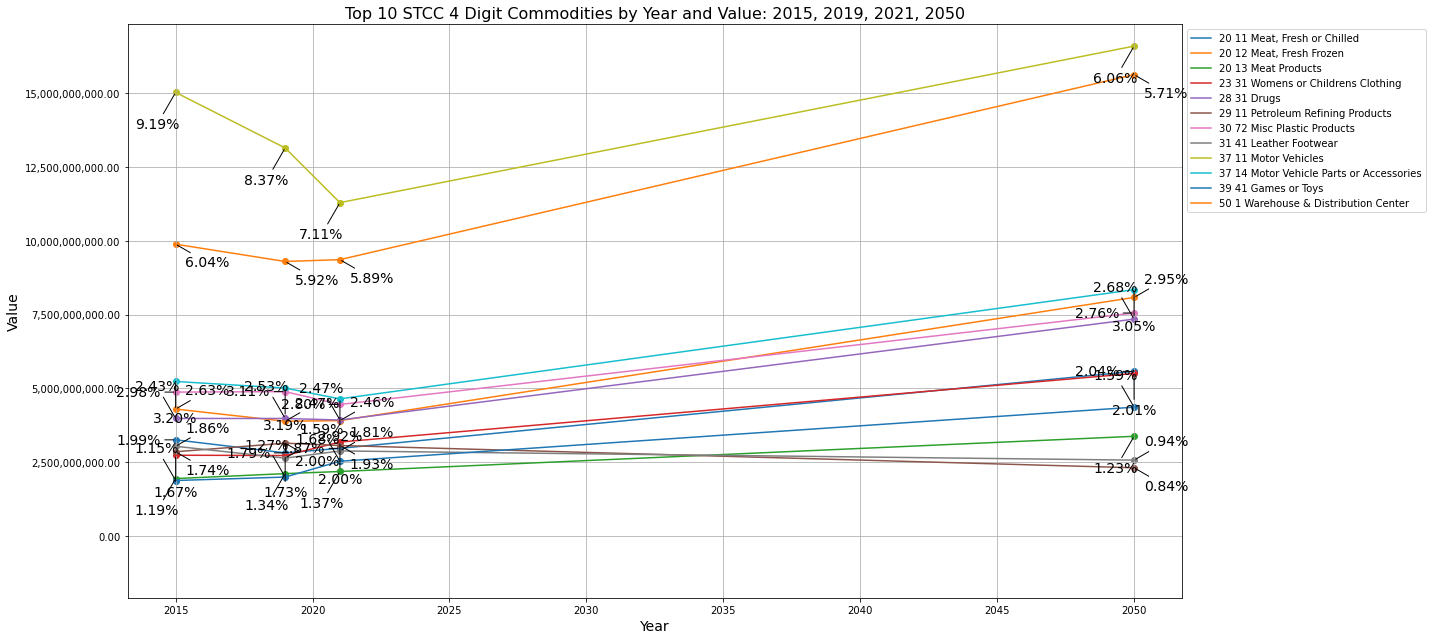

In [25]:
grouped = aggregated_summary.groupby(['Year', 'STCC_x'])['Value'].sum()
top_commodities_per_year = {}

for year in aggregated_summary['Year'].unique():
    top_for_year = grouped[year].nlargest(10).index.tolist()
    top_commodities_per_year[year] = top_for_year

# Get unique commodities across all years
all_top_commodities = set(commodity for yearly_list in top_commodities_per_year.values() for commodity in yearly_list)

filtered_summary = aggregated_summary[aggregated_summary['STCC_x'].isin(all_top_commodities)]
pivot_data = filtered_summary.pivot(index='Year', columns='Commodity', values='Value')

# Calculate total value per year for ALL commodities
total_value_per_year_all_commodities = aggregated_summary.groupby('Year')['Value'].sum()

def calculate_percent_share(row):
    year = row.name
    total_for_year = total_value_per_year_all_commodities[year]
    return (row / total_for_year) * 100

# Create a percentage dataframe
percent_df = pivot_data.apply(calculate_percent_share, axis=1)

# Your annotation spreading function
def spread_annotations(ax, year, value, percent, base_radius=15):
    n = len(percent)  # number of commodities
    spread_radius = base_radius + 2 * (n-1)  # Dynamic radius adjustment
    angles = np.linspace(0, 2 * np.pi, n + 1)[:-1]  # full circle
    median_value = np.median(value.values)
    
    for idx, (commodity, pct) in enumerate(percent.items()):
        # Check if the value is above or below the median
        angle_multiplier = 1 if value[commodity] >= median_value else -1

        x_offset = spread_radius * np.cos(angles[idx]) * angle_multiplier
        y_offset = spread_radius * np.sin(angles[idx]) * angle_multiplier

        ax.annotate(f"{pct:.2f}%", 
                    (year, value[commodity]), 
                    textcoords="offset pixels", 
                    xytext=(x_offset, y_offset), 
                    ha='center', 
                    va='center', 
                    arrowprops=dict(arrowstyle='-', lw=1),
                    fontsize=14)

# Your plotting function
def create_time_series_pivot(df, percent_df):
    fig, ax = plt.subplots(figsize=(20, 9))
    
    for commodity in df.columns:
        ax.plot(df.index, df[commodity], label=commodity)
        ax.scatter(df.index, df[commodity])
    
    for year in df.index:
        spread_annotations(ax, year, df.loc[year], percent_df.loc[year])

    # Set legend outside the plot
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.2f}'))
    ax.set_title('Top 10 STCC 4 Digit Commodities by Year and Value: 2015, 2019, 2021, 2050', fontsize=16)
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('Value', fontsize=14)
    ax.grid(True)
    
    # Extend y-limit
    ymin, ymax = ax.get_ylim()
    ax.set_ylim(ymin - 0.2 * (ymax - ymin), ymax)  # provide an extra 20% space at the bottom
    
    # Adjust the layout
    plt.tight_layout()
    plt.show()

create_time_series_pivot(pivot_data, percent_df)


In [87]:
# First, combine all commodities into a single set
combined_commodities = set(commodity for yearly_list in top_commodities_per_year.values() for commodity in yearly_list)

# Check which commodities in the combined set are unique to each year
unique_commodities_per_year = {}

for year, commodities in top_commodities_per_year.items():
    unique_commodities = set(commodities) - (combined_commodities - set(commodities))
    unique_commodities_per_year[year] = list(unique_commodities)

for year, unique_commodities in unique_commodities_per_year.items():
    print(f"Year {year} has unique top commodities: {unique_commodities}")


Year 2015 has unique top commodities: ['50 1', '20 12', '31 41', '37 14', '20 11', '28 31', '30 72', '23 31', '37 11', '29 11']
Year 2019 has unique top commodities: ['50 1', '20 12', '31 41', '37 14', '20 11', '28 31', '30 72', '23 31', '37 11', '29 11']
Year 2021 has unique top commodities: ['50 1', '20 12', '31 41', '37 14', '20 11', '28 31', '30 72', '23 31', '37 11', '29 11']
Year 2050 has unique top commodities: ['50 1', '20 12', '20 13', '37 14', '20 11', '28 31', '39 41', '30 72', '23 31', '37 11']


In [26]:
percent_df

Commodity,"20 11 Meat, Fresh or Chilled","20 12 Meat, Fresh Frozen",20 13 Meat Products,23 31 Womens or Childrens Clothing,28 31 Drugs,29 11 Petroleum Refining Products,30 72 Misc Plastic Products,31 41 Leather Footwear,37 11 Motor Vehicles,37 14 Motor Vehicle Parts or Accessories,39 41 Games or Toys,50 1 Warehouse & Distribution Center
Year,,,,,,,,,,,,
2015,1.990107,2.627848,1.187908,1.671301,2.433370,1.742997,2.979422,1.856622,9.188421,3.199561,1.147539,6.043979
2019,1.790387,2.472337,1.342966,1.733348,2.531927,1.999570,3.111076,1.676789,8.365959,3.187942,1.268548,5.917575
2021,1.868051,2.459386,1.374136,2.002252,2.472714,1.928880,2.804383,1.812752,7.111049,2.923944,1.593038,5.894373
2050,2.036837,2.952263,1.232947,2.011340,2.683692,0.843576,2.759485,0.938049,6.063318,3.048331,1.593509,5.710265


In [33]:
# Melt the percent_df dataframe
long_format_df = percent_df.reset_index().melt(id_vars='Year', 
                                               value_name='Percentage', 
                                               var_name='Commodity')

# Pivot the melted dataframe
pivoted_df = long_format_df.pivot(index='Commodity', columns='Year', values='Percentage').reset_index()

# Save to CSV
pivoted_df.to_csv('percentage_value_pivoted.csv', index=False)



In [32]:
pivoted_df

Year,Commodity,2015,2019,2021,2050
0,"20 11 Meat, Fresh or Chilled",1.990107,1.790387,1.868051,2.036837
1,"20 12 Meat, Fresh Frozen",2.627848,2.472337,2.459386,2.952263
2,20 13 Meat Products,1.187908,1.342966,1.374136,1.232947
3,23 31 Womens or Childrens Clothing,1.671301,1.733348,2.002252,2.011340
4,28 31 Drugs,2.433370,2.531927,2.472714,2.683692
5,29 11 Petroleum Refining Products,1.742997,1.999570,1.928880,0.843576
6,30 72 Misc Plastic Products,2.979422,3.111076,2.804383,2.759485
7,31 41 Leather Footwear,1.856622,1.676789,1.812752,0.938049
8,37 11 Motor Vehicles,9.188421,8.365959,7.111049,6.063318
9,37 14 Motor Vehicle Parts or Accessories,3.199561,3.187942,2.923944,3.048331


In [28]:
#percent_df.to_csv('T10percent_Value.csv', index=False)

### BEST GRAPH FORMAT
## Decluttered

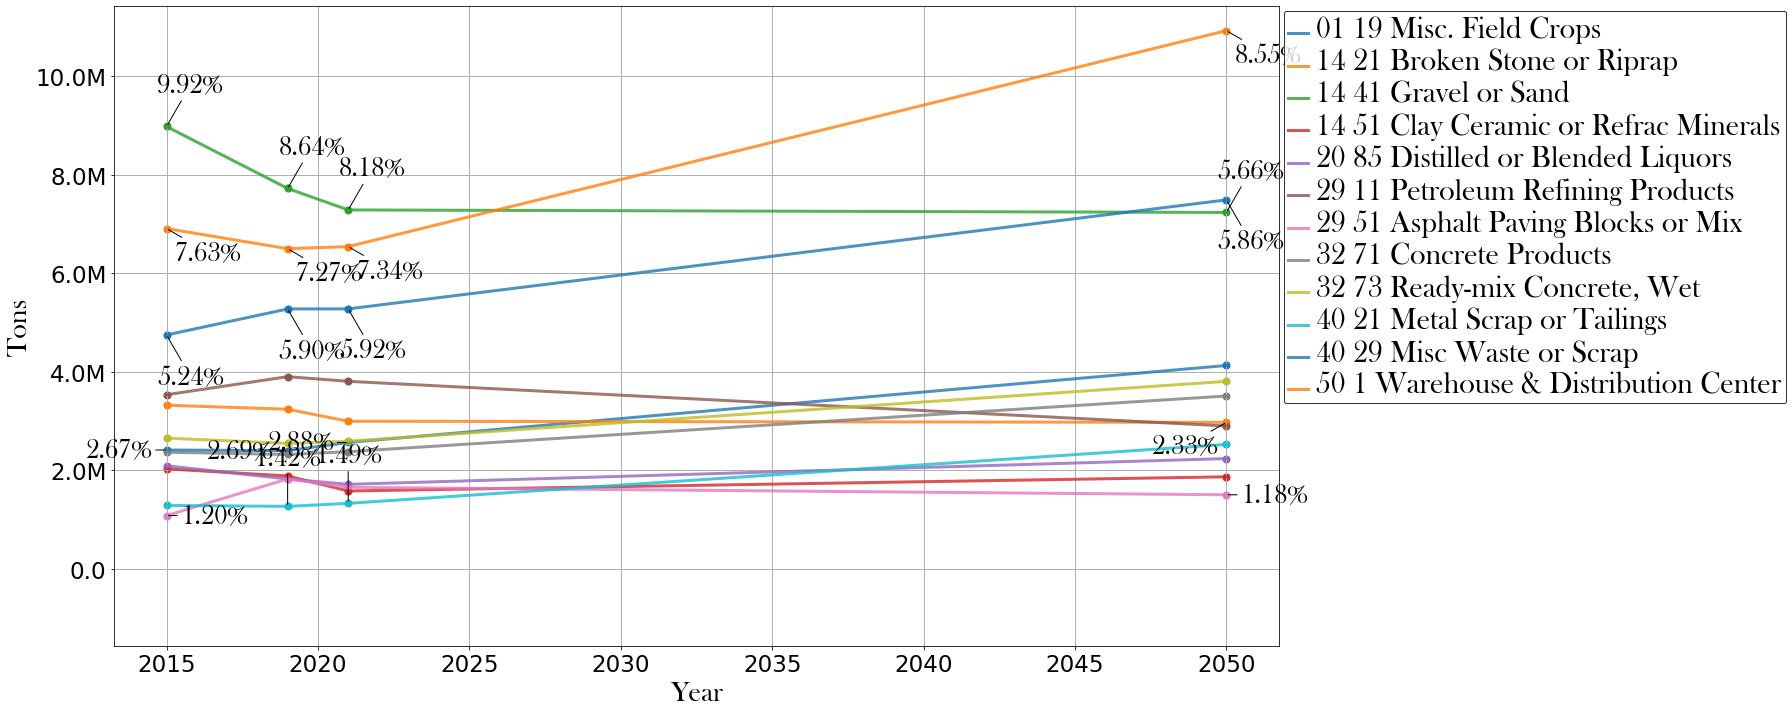

In [23]:
from matplotlib.ticker import FuncFormatter
from matplotlib.font_manager import FontProperties

font = FontProperties(family='Baskerville Old Face')

grouped = aggregated_summary.groupby(['Year', 'STCC_x'])['Tons'].sum()
top_commodities_per_year = {}

for year in aggregated_summary['Year'].unique():
    top_for_year = grouped[year].nlargest(10).index.tolist()
    top_commodities_per_year[year] = top_for_year

all_top_commodities = set(commodity for yearly_list in top_commodities_per_year.values() for commodity in yearly_list)

filtered_summary = aggregated_summary[aggregated_summary['STCC_x'].isin(all_top_commodities)]
pivot_data = filtered_summary.pivot(index='Year', columns='Commodity', values='Tons')

total_tons_per_year_all_commodities = aggregated_summary.groupby('Year')['Tons'].sum()

def calculate_percent_share(row):
    year = row.name
    total_for_year = total_tons_per_year_all_commodities[year]
    return (row / total_for_year) * 100

percent_df = pivot_data.apply(calculate_percent_share, axis=1)

def tons_formatter(x, pos):
    return f'{x / 1_000_000:.1f}M' if x >= 1_000_000 else f'{x / 1_000:.1f}K' if x >= 1_000 else str(x)

def spread_annotations(ax, year, value, percent, base_radius=10, font_size=22):
    n = len(percent)
    base_radius = 15  # Increase base radius
    spread_radius = base_radius + 3 * (n-1)  # Increase the multiplier for a larger spread
    angles = np.linspace(0, 2 * np.pi, n + 1)[:-1]
    median_value = np.median(value.values)

    sorted_values = value.sort_values()
    bottom_5 = sorted_values.head(10)  # Select bottom 5 instead of 7
    selected_bottom_values = [bottom_5.iloc[0], bottom_5.iloc[len(bottom_5)//2], bottom_5.iloc[-1]]  # Min, median, max from bottom 5
    
    for idx, (commodity, pct) in enumerate(percent.items()):
        is_top_value = value[commodity] not in bottom_5.values
        is_selected_bottom_value = value[commodity] in selected_bottom_values

        if not (is_top_value or is_selected_bottom_value):
            continue

        angle_multiplier = 1 if value[commodity] >= median_value else -1

        x_offset = spread_radius * np.cos(angles[idx]) * angle_multiplier
        y_offset = spread_radius * np.sin(angles[idx]) * angle_multiplier

        ax.annotate(f"{pct:.2f}%", 
                    (year, value[commodity]), 
                    textcoords="offset pixels", 
                    xytext=(x_offset, y_offset), 
                    ha='center', 
                    va='center', 
                    arrowprops=dict(arrowstyle='-', lw=1),
                    fontsize=font_size,
                    fontproperties=font)

# Your plotting function
def create_time_series_pivot(df, percent_df, annotation_font_size=14):
    fig, ax = plt.subplots(figsize=(25, 10))
    
    for commodity in df.columns:
        ax.plot(df.index, df[commodity], label=commodity, linewidth=3, alpha=0.8) # Line width and transparency
        ax.scatter(df.index, df[commodity], s=50) # Marker size
    
    for year in df.index:
        spread_annotations(ax, year, df.loc[year], percent_df.loc[year], font_size=annotation_font_size)

       # Set legend outside the plot with updated font
    legend = ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=50, prop=font, markerscale=2, frameon=True)
    legend.get_frame().set_edgecolor('black')  # optional: add a frame edge
    for text in legend.get_texts():
        text.set_fontsize(30)  # Adjust the fontsize here
    ax.yaxis.set_major_formatter(FuncFormatter(tons_formatter))
    #ax.set_title('Top 10 STCC 4 Digit Commodities by Year and Tons: 2015, 2019, 2021, 2050', fontsize=30, fontproperties=font)
    ax.set_xlabel('Year', fontsize=28, fontproperties=font)
    ax.set_ylabel('Tons', fontsize=28, fontproperties=font)
    ax.grid(True)
    ax.grid(True, linewidth=1, alpha=1)
    plt.xticks(fontsize=23, fontproperties=font)
    plt.yticks(fontsize=23, fontproperties=font)

    ymin, ymax = ax.get_ylim()
    ax.set_ylim(ymin - 0.2 * (ymax - ymin), ymax)
    plt.tight_layout(rect=[0, 0, 1, 1])
    plt.show()

create_time_series_pivot(pivot_data, percent_df, annotation_font_size=27)


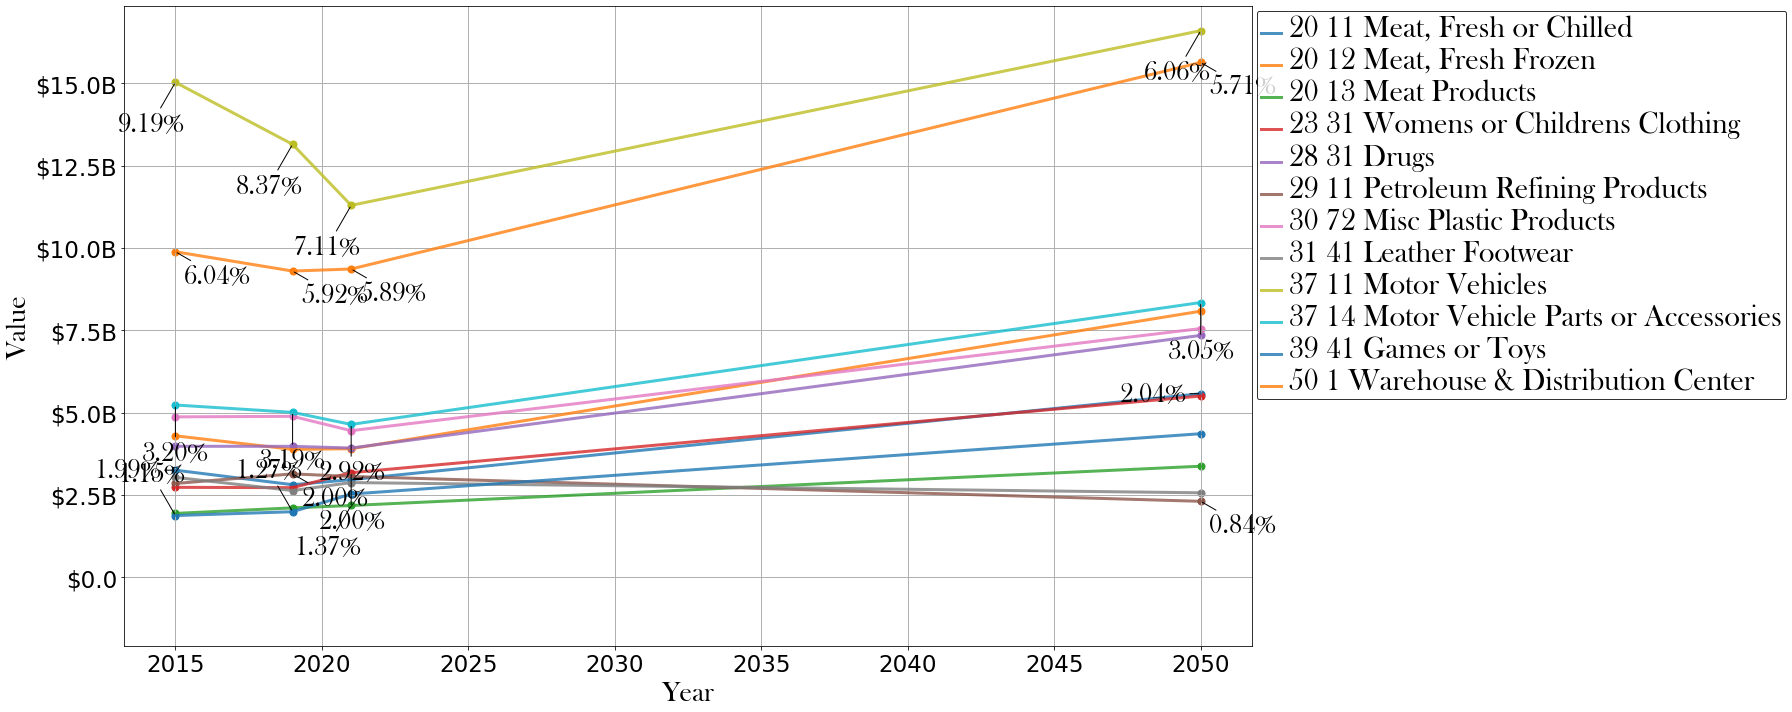

In [25]:
from matplotlib.ticker import FuncFormatter
from matplotlib.font_manager import FontProperties

font = FontProperties(family='Baskerville Old Face')

grouped = aggregated_summary.groupby(['Year', 'STCC_x'])['Value'].sum() # Updated to 'Value'
top_commodities_per_year = {}

for year in aggregated_summary['Year'].unique():
    top_for_year = grouped[year].nlargest(10).index.tolist()
    top_commodities_per_year[year] = top_for_year

all_top_commodities = set(commodity for yearly_list in top_commodities_per_year.values() for commodity in yearly_list)

filtered_summary = aggregated_summary[aggregated_summary['STCC_x'].isin(all_top_commodities)]
pivot_data = filtered_summary.pivot(index='Year', columns='Commodity', values='Value') # Updated to 'Value'

total_values_per_year_all_commodities = aggregated_summary.groupby('Year')['Value'].sum() # Updated to 'Value'

def calculate_percent_share(row):
    year = row.name
    total_for_year = total_values_per_year_all_commodities[year]
    return (row / total_for_year) * 100

percent_df = pivot_data.apply(calculate_percent_share, axis=1)

def value_formatter(x, pos):
    if x >= 1_000_000_000:
        return f'${x / 1_000_000_000:.1f}B'
    elif x >= 1_000_000:
        return f'${x / 1_000_000:.1f}M'
    elif x >= 1_000:
        return f'${x / 1_000:.1f}K'
    else:
        return f'${x}'

# Same plotting function with updated labels
def create_time_series_pivot(df, percent_df, annotation_font_size=14):
    fig, ax = plt.subplots(figsize=(25, 10))
    
    for commodity in df.columns:
        ax.plot(df.index, df[commodity], label=commodity, linewidth=3, alpha=0.8) # Line width and transparency
        ax.scatter(df.index, df[commodity], s=50) # Marker size
        
    for year in df.index:
        spread_annotations(ax, year, df.loc[year], percent_df.loc[year], font_size=annotation_font_size)

       # Set legend outside the plot with updated font
    legend = ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=50, prop=font, markerscale=2, frameon=True)
    legend.get_frame().set_edgecolor('black')  # optional: add a frame edge
    for text in legend.get_texts():
        text.set_fontsize(30)  # Adjust the fontsize here

    ax.yaxis.set_major_formatter(FuncFormatter(value_formatter))
    #ax.set_title('Top 10 STCC 4 Digit Commodities by Year and Value: 2015, 2019, 2021, 2050', fontsize=30, fontproperties=font)
    ax.set_xlabel('Year', fontsize=28, fontproperties=font)
    ax.set_ylabel('Value', fontsize=28, fontproperties=font) # Updated to 'Value'
    # ...
    ax.grid(True)
    ax.grid(True, linewidth=1, alpha=1)
    plt.xticks(fontsize=23, fontproperties=font)
    plt.yticks(fontsize=23, fontproperties=font)

    ymin, ymax = ax.get_ylim()
    ax.set_ylim(ymin - 0.2 * (ymax - ymin), ymax)
    plt.tight_layout(rect=[0, 0, 1, 1])
    plt.show()

create_time_series_pivot(pivot_data, percent_df, annotation_font_size=27)


In [36]:
percent_df


Commodity,01 19 Misc. Field Crops,14 21 Broken Stone or Riprap,14 41 Gravel or Sand,14 51 Clay Ceramic or Refrac Minerals,20 85 Distilled or Blended Liquors,29 11 Petroleum Refining Products,29 51 Asphalt Paving Blocks or Mix,32 71 Concrete Products,"32 73 Ready-mix Concrete, Wet",40 21 Metal Scrap or Tailings,40 29 Misc Waste or Scrap,50 1 Warehouse & Distribution Center
Year,,,,,,,,,,,,
2015,2.666184,3.670080,9.915444,2.243650,2.312263,3.904411,1.197020,2.616570,2.932833,1.423878,5.243794,7.629082
2019,2.685483,3.625954,8.638353,2.111452,2.043399,4.365569,2.044562,2.599473,2.850308,1.421335,5.902778,7.270301
2021,2.881148,3.364568,8.176046,1.776379,1.927405,4.273350,1.860173,2.671300,2.909083,1.494002,5.922779,7.341830
2050,3.231730,2.328465,5.661810,1.463618,1.753081,2.270962,1.178309,2.747170,2.979949,1.977723,5.861086,8.548778


In [97]:
# Melt the percent_df dataframe
long_format_df = percent_df.reset_index().melt(id_vars='Year', 
                                               value_name='Percentage', 
                                               var_name='Commodity')

# Pivot the melted dataframe
pivoted_df = long_format_df.pivot(index='Commodity', columns='Year', values='Percentage').reset_index()

# Save to CSV
pivoted_df.to_csv('percentage_tons_pivoted.csv', index=False)



In [38]:
pivoted_df

Year,Commodity,2015,2019,2021,2050
0,01 19 Misc. Field Crops,2.666184,2.685483,2.881148,3.231730
1,14 21 Broken Stone or Riprap,3.670080,3.625954,3.364568,2.328465
2,14 41 Gravel or Sand,9.915444,8.638353,8.176046,5.661810
3,14 51 Clay Ceramic or Refrac Minerals,2.243650,2.111452,1.776379,1.463618
4,20 85 Distilled or Blended Liquors,2.312263,2.043399,1.927405,1.753081
5,29 11 Petroleum Refining Products,3.904411,4.365569,4.273350,2.270962
6,29 51 Asphalt Paving Blocks or Mix,1.197020,2.044562,1.860173,1.178309
7,32 71 Concrete Products,2.616570,2.599473,2.671300,2.747170
8,"32 73 Ready-mix Concrete, Wet",2.932833,2.850308,2.909083,2.979949
9,40 21 Metal Scrap or Tailings,1.423878,1.421335,1.494002,1.977723


In [93]:
# First, combine all commodities into a single set
combined_commodities = set(commodity for yearly_list in top_commodities_per_year.values() for commodity in yearly_list)

# Check which commodities in the combined set are unique to each year
unique_commodities_per_year = {}

for year, commodities in top_commodities_per_year.items():
    unique_commodities = set(commodities) - (combined_commodities - set(commodities))
    unique_commodities_per_year[year] = list(unique_commodities)

for year, unique_commodities in unique_commodities_per_year.items():
    print(f"Year {year} has unique top commodities: {unique_commodities}")


Year 2015 has unique top commodities: ['50 1', '20 85', '40 29', '14 51', '14 41', '14 21', '32 73', '32 71', '29 11', '01 19']
Year 2019 has unique top commodities: ['50 1', '14 51', '40 29', '14 41', '14 21', '29 51', '32 73', '32 71', '29 11', '01 19']
Year 2021 has unique top commodities: ['50 1', '20 85', '40 29', '14 41', '14 21', '29 51', '32 73', '32 71', '29 11', '01 19']
Year 2050 has unique top commodities: ['50 1', '20 85', '40 29', '14 41', '14 21', '40 21', '32 73', '32 71', '29 11', '01 19']


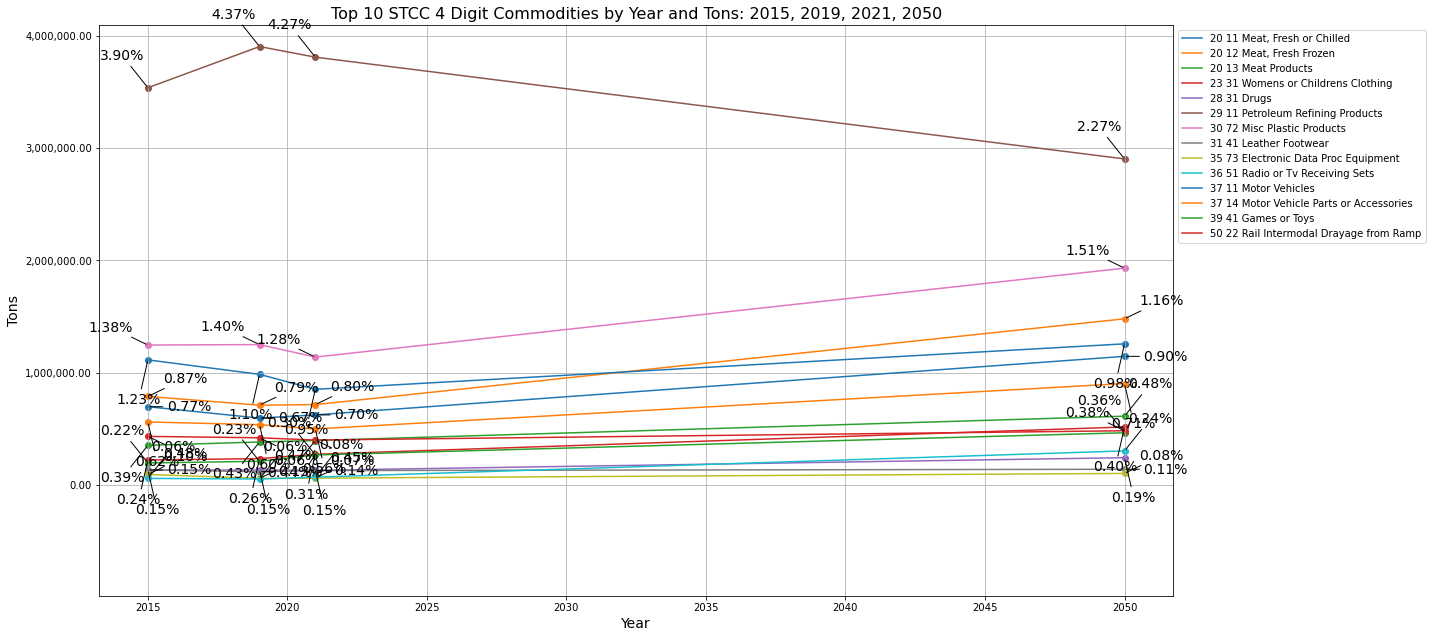

In [19]:
# Filter out the value you don't want
filtered_aggregated_summary = aggregated_summary[aggregated_summary['STCC_x'] != '50 1']

# Now perform the grouping and top 10 calculation using the filtered data
grouped = filtered_aggregated_summary.groupby(['Year', 'STCC_x'])['Value'].sum()
top_commodities_per_year = {}

for year in filtered_aggregated_summary['Year'].unique():
    top_for_year = grouped[year].nlargest(10).index.tolist()
    top_commodities_per_year[year] = top_for_year

# Everything else remains the same

# ... rest of your code
# Get unique commodities across all years
all_top_commodities = set(commodity for yearly_list in top_commodities_per_year.values() for commodity in yearly_list)

filtered_summary = aggregated_summary[aggregated_summary['STCC_x'].isin(all_top_commodities)]
pivot_data = filtered_summary.pivot(index='Year', columns='Commodity', values='Tons')

# Calculate total tons per year for ALL commodities
total_tons_per_year_all_commodities = aggregated_summary.groupby('Year')['Tons'].sum()

def calculate_percent_share(row):
    year = row.name
    total_for_year = total_tons_per_year_all_commodities[year]
    return (row / total_for_year) * 100

# Create a percentage dataframe
percent_df = pivot_data.apply(calculate_percent_share, axis=1)

# Your annotation spreading function
def spread_annotations(ax, year, value, percent, base_radius=15):
    n = len(percent)  # number of commodities
    spread_radius = base_radius + 2 * (n-1)  # Dynamic radius adjustment
    angles = np.linspace(0, 2 * np.pi, n + 1)[:-1]  # full circle
    median_value = np.median(value.values)
    
    for idx, (commodity, pct) in enumerate(percent.items()):
        # Check if the value is above or below the median
        angle_multiplier = 1 if value[commodity] >= median_value else -1

        x_offset = spread_radius * np.cos(angles[idx]) * angle_multiplier
        y_offset = spread_radius * np.sin(angles[idx]) * angle_multiplier

        ax.annotate(f"{pct:.2f}%", 
                    (year, value[commodity]), 
                    textcoords="offset pixels", 
                    xytext=(x_offset, y_offset), 
                    ha='center', 
                    va='center', 
                    arrowprops=dict(arrowstyle='-', lw=1),
                    fontsize=14)

# Your plotting function
def create_time_series_pivot(df, percent_df):
    fig, ax = plt.subplots(figsize=(20, 9))
    
    for commodity in df.columns:
        ax.plot(df.index, df[commodity], label=commodity)
        ax.scatter(df.index, df[commodity])
    
    for year in df.index:
        spread_annotations(ax, year, df.loc[year], percent_df.loc[year])

    # Set legend outside the plot
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.2f}'))
    ax.set_title('Top 10 STCC 4 Digit Commodities by Year and Tons: 2015, 2019, 2021, 2050', fontsize=16)
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('Tons', fontsize=14)
    ax.grid(True)
    
    # Extend y-limit
    ymin, ymax = ax.get_ylim()
    ax.set_ylim(ymin - 0.2 * (ymax - ymin), ymax)  # provide an extra 20% space at the bottom
    
    # Adjust the layout
    plt.tight_layout()
    plt.show()

create_time_series_pivot(pivot_data, percent_df)